In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sb.set() # set the default Seaborn style for graphics
import seaborn as sns

# Import Dataset

In [2]:
data = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')
data.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


In [3]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 16136
Number of columns: 16


# Drop null rows

In [4]:
# # Drop rows with any null values
# data.dropna(inplace=True)

# # Display the first few rows of the DataFrame after removing null rows
# data.head()

In [5]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 16136
Number of columns: 16


<!-- ## separate those with available promo with & without -->

# Ratings vs Delivery cost

In [6]:
rating = pd.DataFrame(data['rating'])
rating.describe()

,rating
count,14004.000000
mean,4.238346
std,0.619217
min,-1.000000
25%,4.000000
50%,4.300000
75%,4.600000
max,5.000000


In [7]:
delivery_cost = pd.DataFrame(data['delivery_cost'])
delivery_cost.describe()

,delivery_cost
count,16085.000000
mean,984.926640
std,656.544752
min,199.000000
25%,450.000000
50%,680.000000
75%,1610.000000
max,14000.000000


<Axes: >

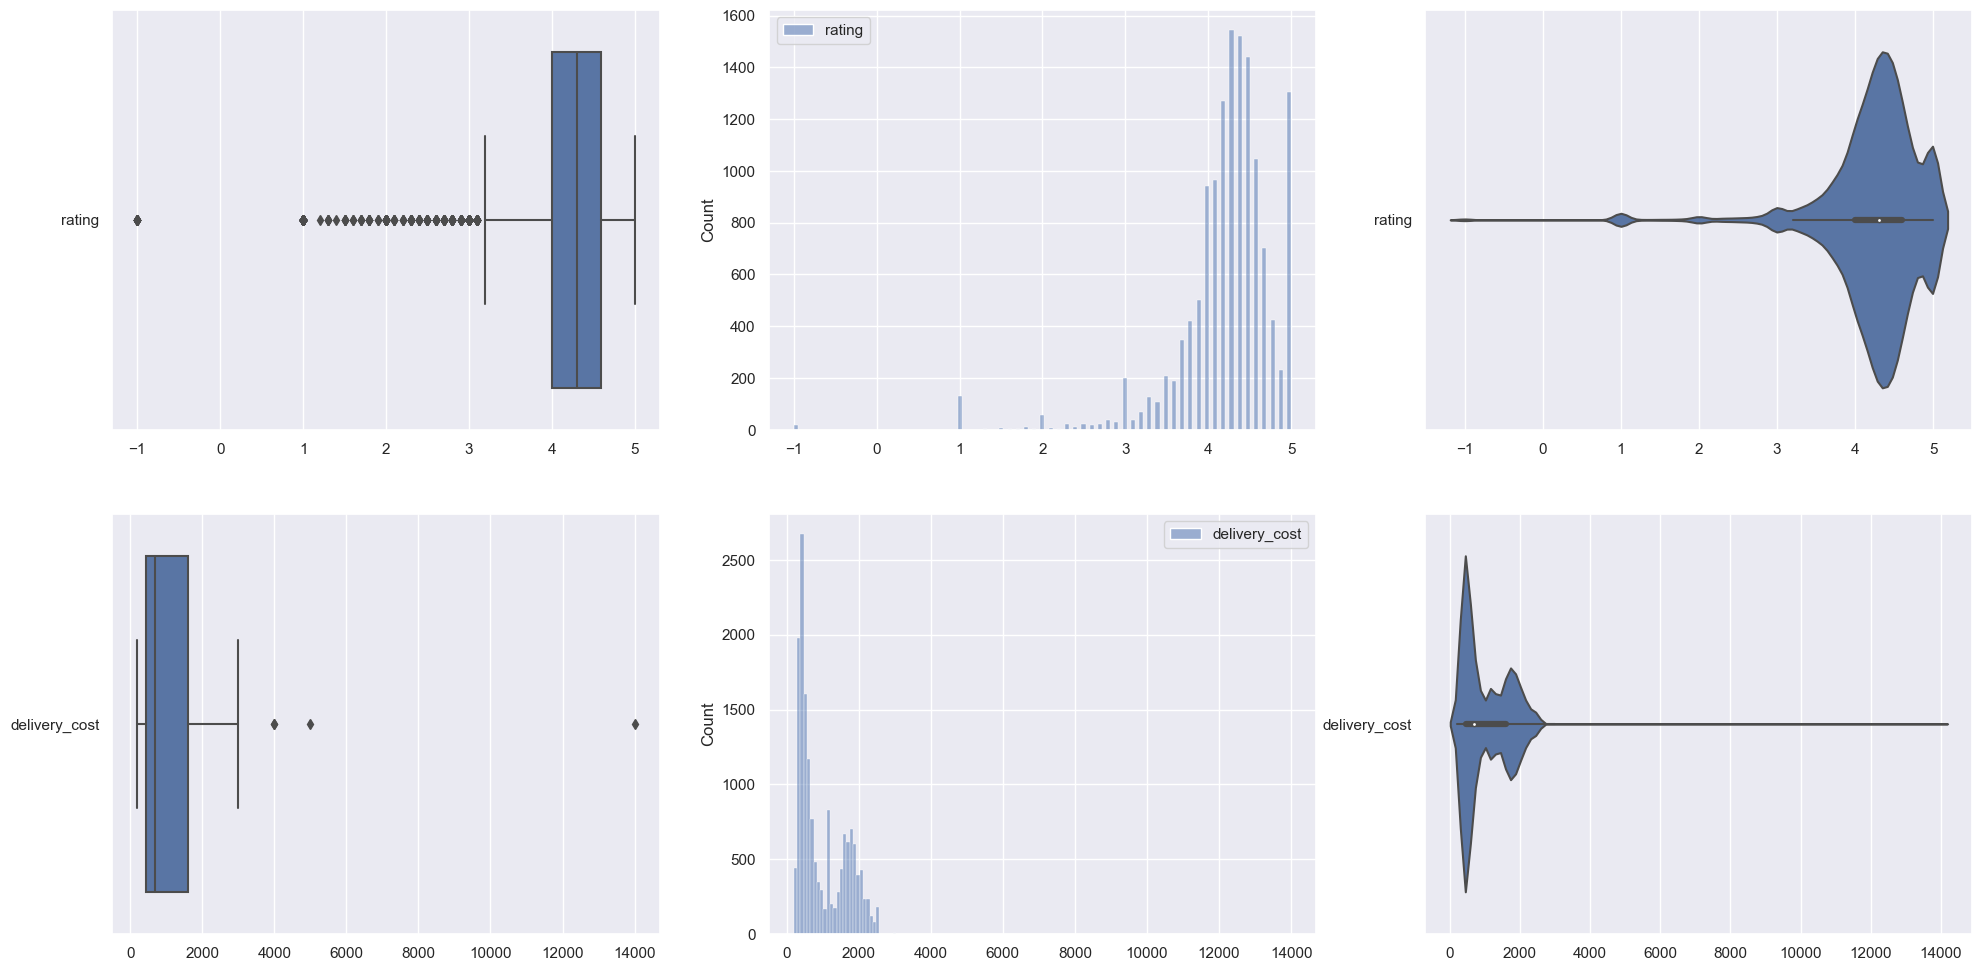

In [8]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rating, orient = "h", ax = axes[0,0])
sb.histplot(data = rating, ax = axes[0,1])
sb.violinplot(data = rating, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = delivery_cost, orient = "h", ax = axes[1,0])
sb.histplot(data = delivery_cost, ax = axes[1,1])
sb.violinplot(data = delivery_cost, orient = "h", ax = axes[1,2])

In [9]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
delivery_cost = pd.DataFrame(data['delivery_cost'] / 100)

# Combine the two DataFrames horizontally
result = pd.concat([rating, delivery_cost], axis=1)

# Display the resulting DataFrame
result.head()

,rating,delivery_cost
0,3.8,5.7
1,4.2,5.7
2,4.5,5.6
3,4.4,5.6
4,4.6,5.7


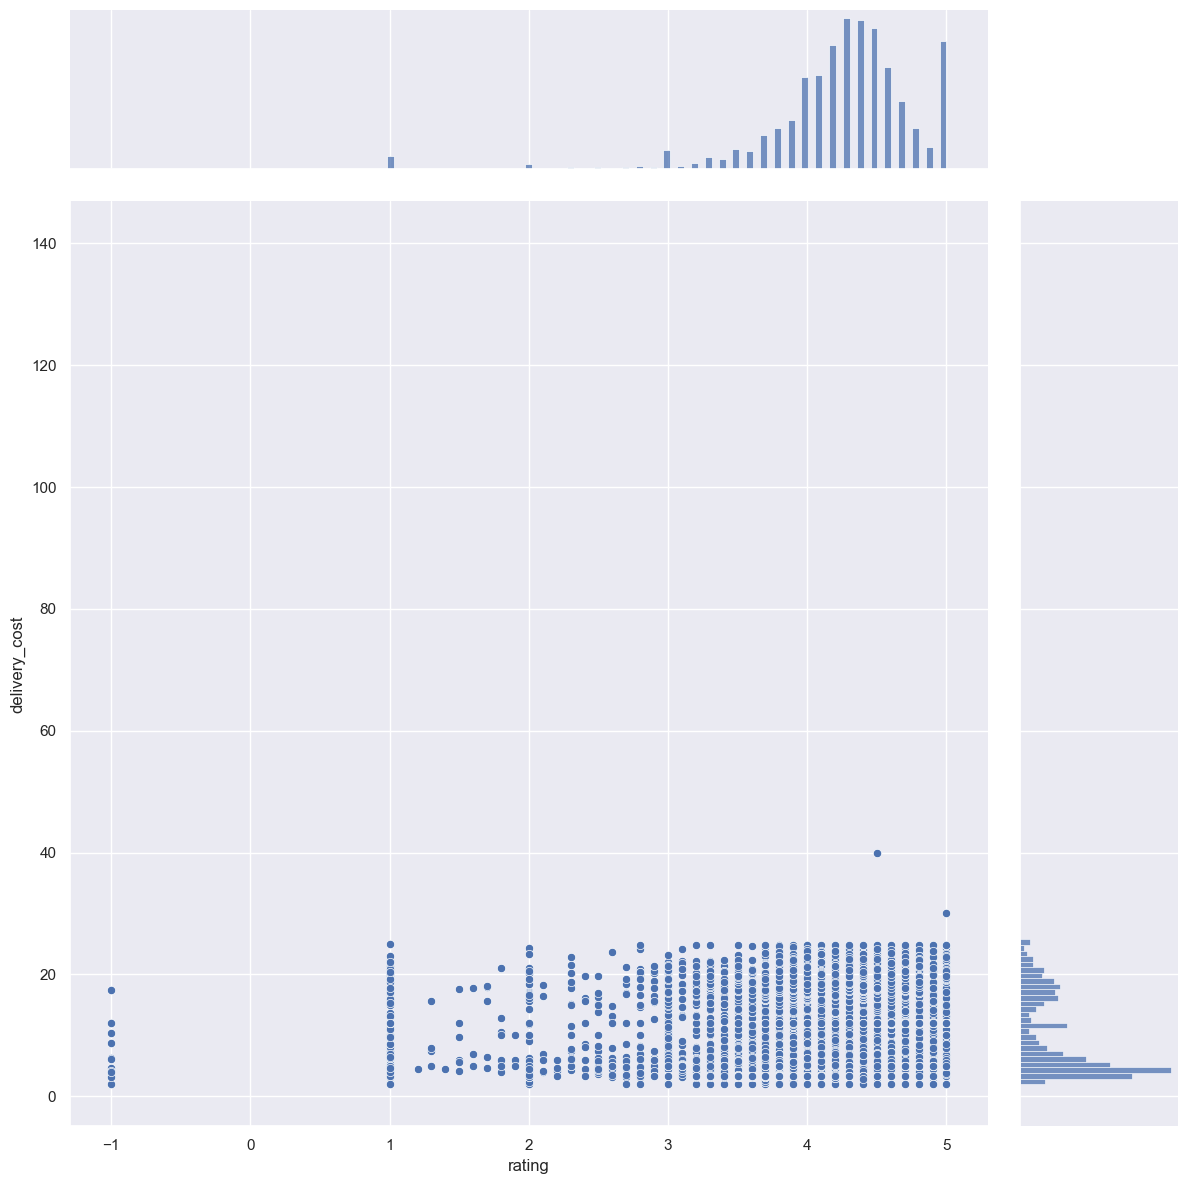

In [10]:
jointDF = pd.concat([rating, delivery_cost], axis = 1).reindex(rating.index)
sb.jointplot(data = jointDF, x = "rating", y = "delivery_cost", height = 12)

In [11]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Display the correlation matrix
print(correlation_matrix)

                 rating  delivery_cost
rating         1.000000      -0.000057
delivery_cost -0.000057       1.000000


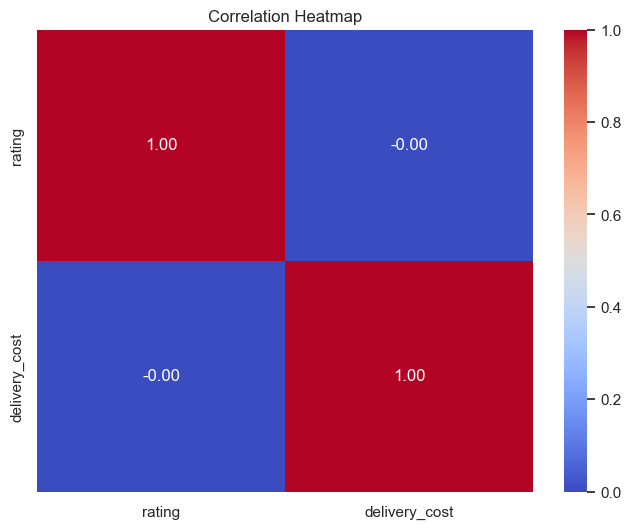

In [12]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## since the correlation is near 0, this analysis shows that there is no apprarent linear relaionship between the variables. 

# Ratings vs Delivery time 

In [13]:
delivery_time = pd.DataFrame(data['delivery_time'])
delivery_time.describe()

,delivery_time
count,15953.000000
mean,37.552811
std,15.728705
min,15.000000
25%,28.000000
50%,34.000000
75%,42.000000
max,169.000000


In [14]:
rating = pd.DataFrame(data['rating'])
rating.describe()

,rating
count,14004.000000
mean,4.238346
std,0.619217
min,-1.000000
25%,4.000000
50%,4.300000
75%,4.600000
max,5.000000


<Axes: >

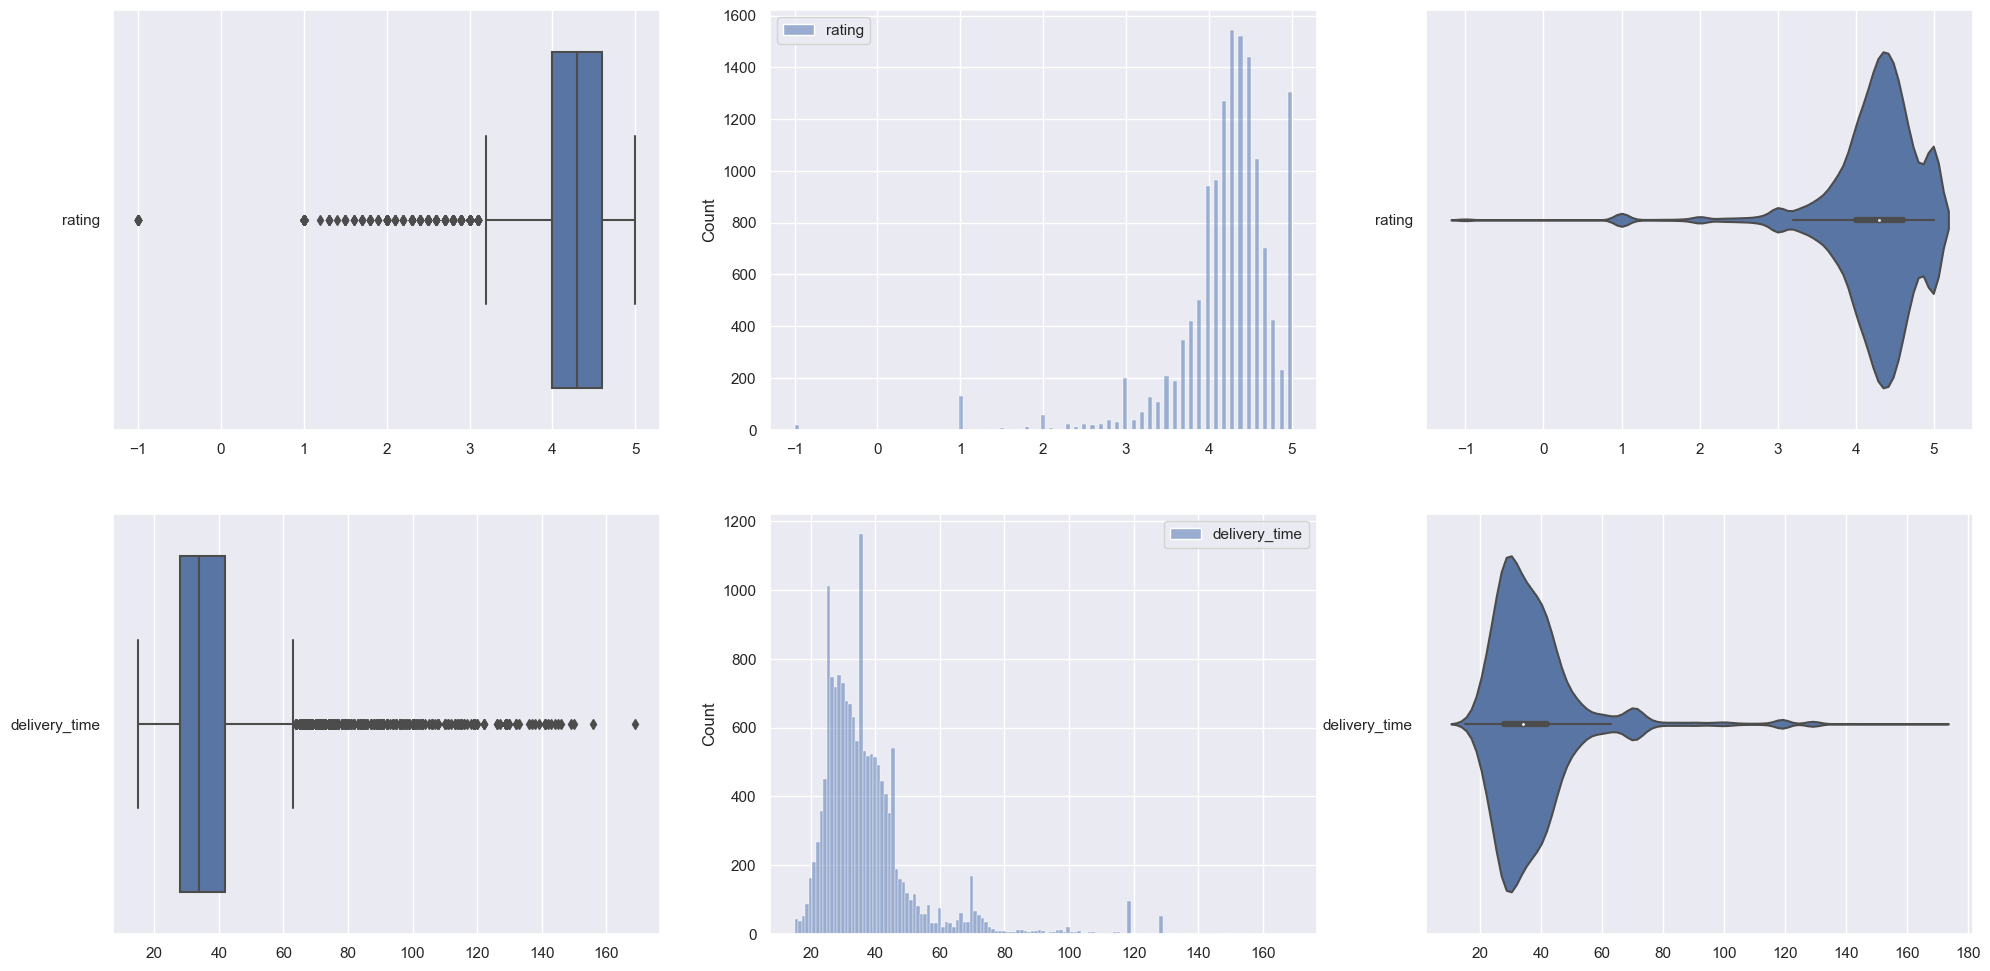

In [15]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rating, orient = "h", ax = axes[0,0])
sb.histplot(data = rating, ax = axes[0,1])
sb.violinplot(data = rating, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = delivery_time, orient = "h", ax = axes[1,0])
sb.histplot(data = delivery_time, ax = axes[1,1])
sb.violinplot(data = delivery_time, orient = "h", ax = axes[1,2])

In [16]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
delivery_time = pd.DataFrame(data['delivery_time'])

# Combine the two DataFrames horizontally
result = pd.concat([rating, delivery_cost], axis=1)

# Display the resulting DataFrame
result.head()

,rating,delivery_cost
0,3.8,5.7
1,4.2,5.7
2,4.5,5.6
3,4.4,5.6
4,4.6,5.7


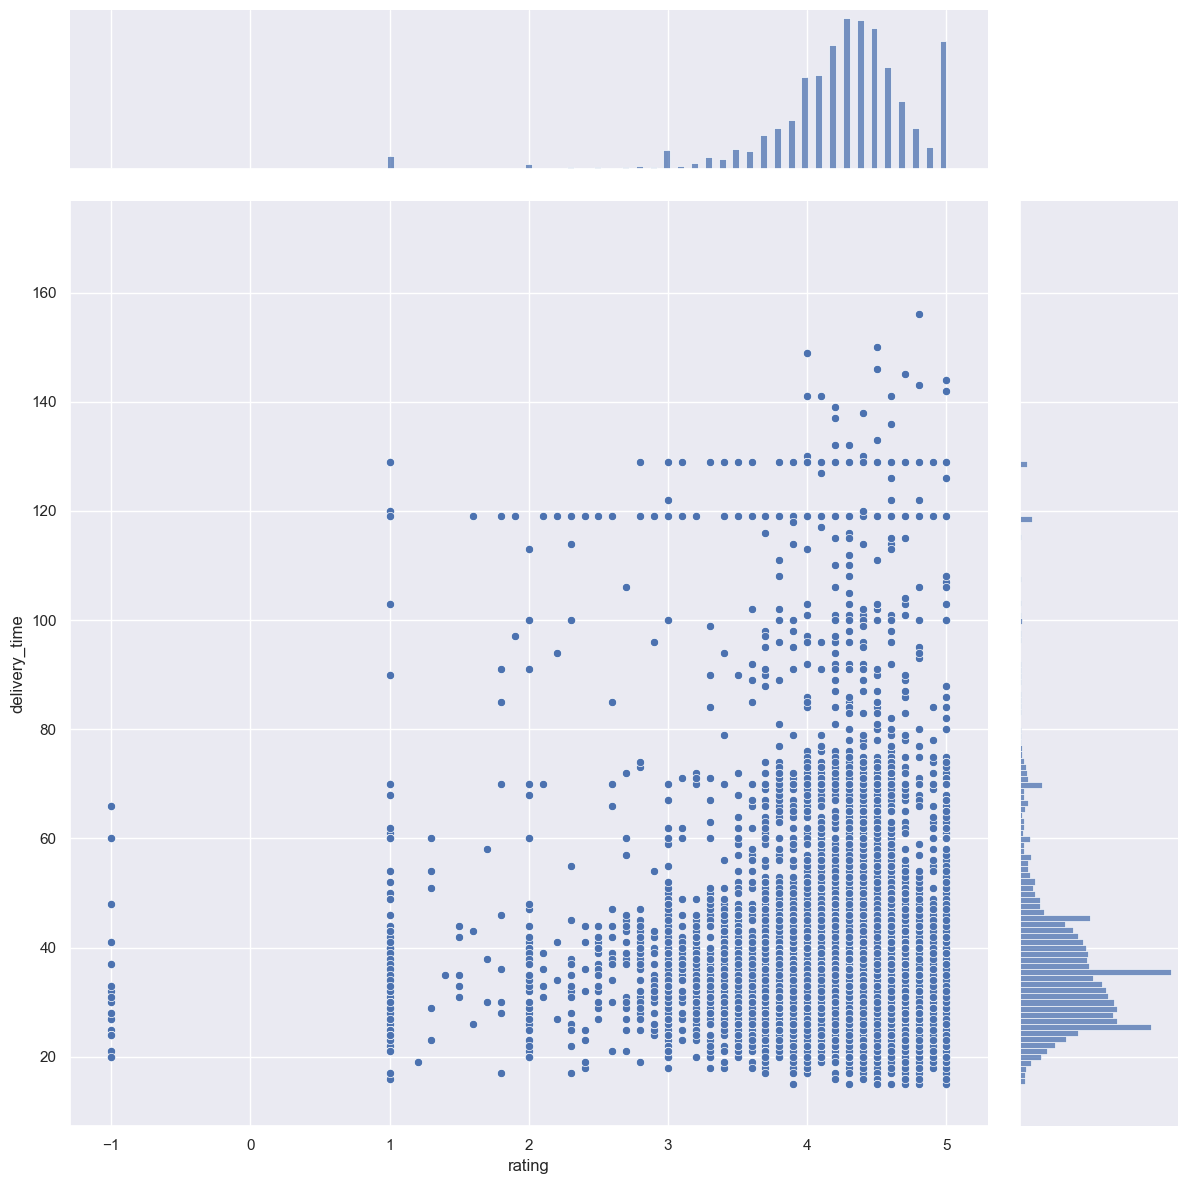

In [17]:
jointDF = pd.concat([rating, delivery_time], axis = 1).reindex(rating.index)
sb.jointplot(data = jointDF, x = "rating", y = "delivery_time", height = 12)

In [18]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Display the correlation matrix
print(correlation_matrix)

                 rating  delivery_cost
rating         1.000000      -0.000057
delivery_cost -0.000057       1.000000


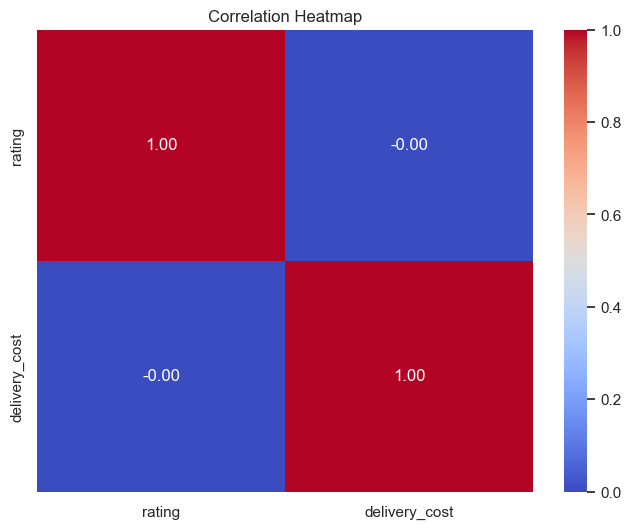

In [19]:
# Calculate the correlation matrix
correlation_matrix = result.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation analysis and visualization between **Delivery Time** and **Rating** show a very weak negative correlation, with a correlation coefficient of approximately **-0.097194**. This indicates that while there is a slight tendency for restaurant ratings to decrease as delivery time increases, the relationship is minimal. The scatter plot does not display a strong or clear trend, suggesting that **Delivery Time alone is not a strong predictor** of restaurant ratings. Given the weak correlation, it is likely that other factors significantly influence ratings, and a more complex model might be needed to capture the multifaceted nature of what impacts customer satisfaction.


## Ratings and Distance 

In [20]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
lon = pd.DataFrame(data['lon'])
lat = pd.DataFrame(data['lat'])
radius = pd.DataFrame(data['radius'])

# Combine the two DataFrames horizontally
result = pd.concat([rating, lon, lat, radius], axis=1)

# Display the resulting DataFrame
result.head()

,rating,lon,lat,radius
0,3.8,103.822103,1.264792,5000
1,4.2,103.822072,1.264741,3000
2,4.5,103.821369,1.264309,5000
3,4.4,103.821712,1.263527,5000
4,4.6,103.822554,1.264810,5000


In [21]:
correlation_coefficient = data['radius'].corr(data['rating'])
correlation_coefficient

0.02240772052487566

### since the correlation is near 0, this analysis shows that there is no apprarent linear relaionship between the variables

## Ratings and Total opening hours 

In [22]:
rating = pd.DataFrame(data['rating'])
rating.describe()

,rating
count,14004.000000
mean,4.238346
std,0.619217
min,-1.000000
25%,4.000000
50%,4.300000
75%,4.600000
max,5.000000


In [23]:
opening_hours = pd.DataFrame(data['total opening time hours'])
opening_hours.describe()

,total opening time hours
count,16136.000000
mean,70.906528
std,29.795949
min,0.000000
25%,57.000000
50%,70.000000
75%,80.500000
max,167.883333


<Axes: >

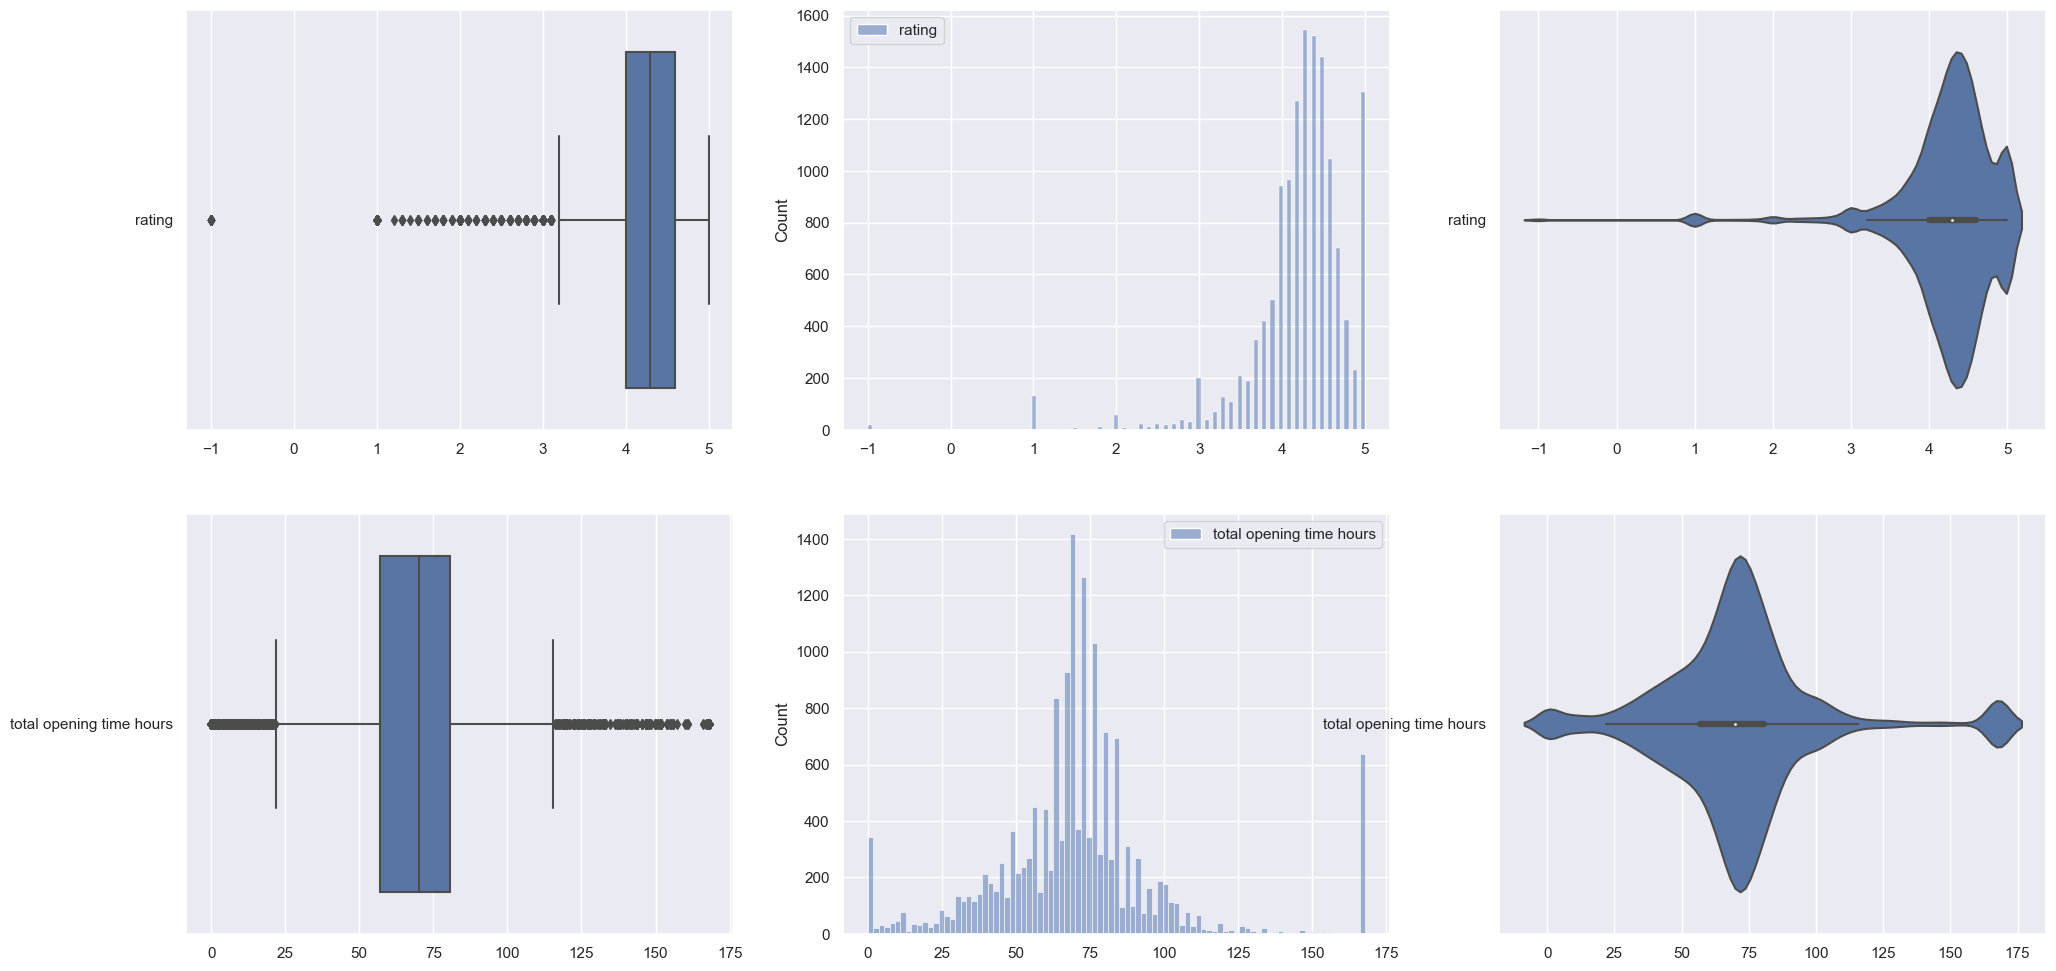

In [24]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = rating, orient = "h", ax = axes[0,0])
sb.histplot(data = rating, ax = axes[0,1])
sb.violinplot(data = rating, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = opening_hours, orient = "h", ax = axes[1,0])
sb.histplot(data = opening_hours, ax = axes[1,1])
sb.violinplot(data = opening_hours, orient = "h", ax = axes[1,2])

In [25]:
# Create DataFrame for 'rating' column
rating = pd.DataFrame(data['rating'])

# Create DataFrame for 'delivery_cost' column and divide by 100
opening_hours = pd.DataFrame(data['total opening time hours'])

# Combine the two DataFrames horizontally
result = pd.concat([rating, opening_hours], axis=1)

# Display the resulting DataFrame
result.head()

,rating,total opening time hours
0,3.8,75.75
1,4.2,49.00
2,4.5,64.75
3,4.4,70.00
4,4.6,73.50


Correlation between Total Opening Time Hours and Rating: -0.01642004688010387


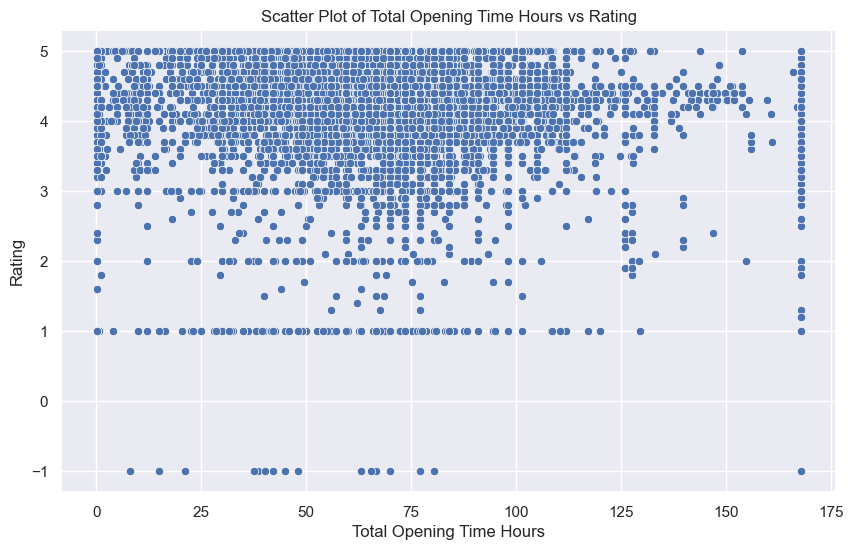

In [26]:
# Drop rows with NaN values in 'rating' or 'total opening time hours' for accurate analysis
filtered_data_hours = data.dropna(subset=['rating', 'total opening time hours'])

# Calculate the correlation between 'total opening time hours' and 'rating'
correlation_hours = filtered_data_hours['total opening time hours'].corr(filtered_data_hours['rating'])

# Display the correlation
print(f"Correlation between Total Opening Time Hours and Rating: {correlation_hours}")

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total opening time hours', y='rating', data=filtered_data_hours)
plt.title('Scatter Plot of Total Opening Time Hours vs Rating')
plt.xlabel('Total Opening Time Hours')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

The correlation analysis between **Total Opening Time Hours** and **Rating** results in a very weak negative correlation coefficient of approximately **-0.085570**. The scatter plot shows no clear trend or significant relationship, indicating that the hours a restaurant is open each day have virtually **no effect on its ratings**. This suggests that **Total Opening Time Hours is not a significant predictor** of restaurant ratings, highlighting the importance of other factors in influencing customer ratings.


## Delivery option vs Ratings 

Unique Delivery Options: ['ONLY_DELIVERY' 'DELIVERY_TAKEAWAY' 'DELIVERY_DINEIN'
 'DELIVERY_TAKEAWAY_DINEIN']

Average Ratings by Delivery Option:
delivery_options
DELIVERY_DINEIN             3.825000
DELIVERY_TAKEAWAY           4.190070
DELIVERY_TAKEAWAY_DINEIN    4.200000
ONLY_DELIVERY               4.399568
Name: rating, dtype: float64


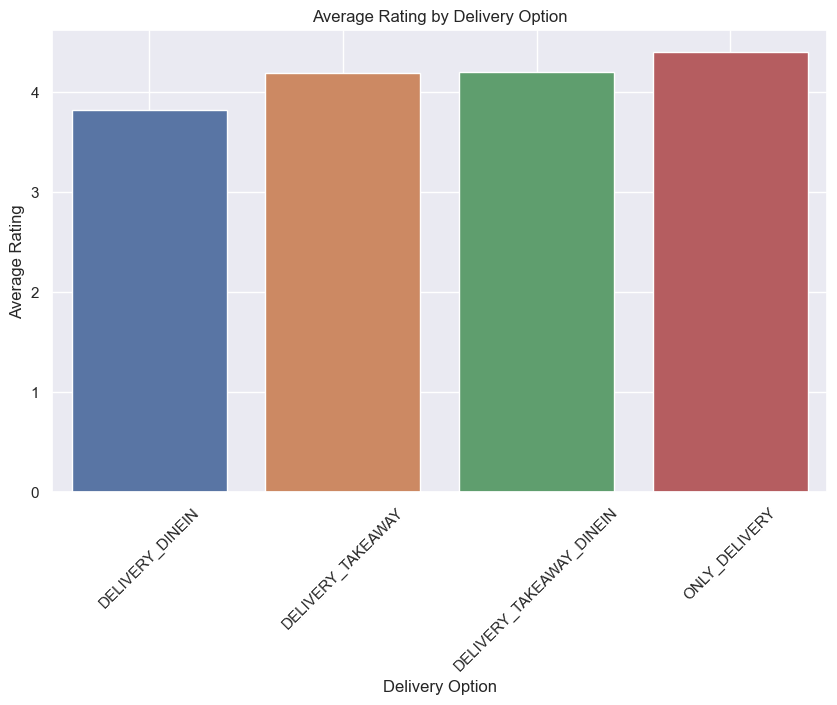

In [29]:
# Inspect the unique categories in the 'delivery_options' column
unique_delivery_options = data['delivery_options'].unique()

# Calculate the average rating for each delivery option
average_ratings_by_delivery_option = data.groupby('delivery_options')['rating'].mean().sort_values()

# Display the unique delivery options and their corresponding average ratings
print("Unique Delivery Options:", unique_delivery_options)
print("\nAverage Ratings by Delivery Option:")
print(average_ratings_by_delivery_option)

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_by_delivery_option.index, y=average_ratings_by_delivery_option.values)
plt.title('Average Rating by Delivery Option')
plt.xlabel('Delivery Option')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The analysis of **Delivery Options** shows significant variation in average restaurant ratings associated with different service types. The highest average rating is observed for **ONLY_DELIVERY** at approximately **4.40**, followed by **DELIVERY_TAKEAWAY_DINEIN** at **4.20**, **DELIVERY_TAKEAWAY** at **4.19**, and **DELIVERY_DINEIN** at **3.83**. This indicates that delivery options are a notable predictor of restaurant ratings, with specialized delivery services possibly yielding higher customer satisfaction. The visual comparison using a bar plot further underscores the importance of tailored service options in influencing customer ratings.


In [30]:
from scipy.stats import pointbiserialr

delivery_options_encoded = data['delivery_options'].astype('category').cat.codes

corr, _ = pointbiserialr(delivery_options_encoded, data['rating'])

print("Point-biserial Correlation Coefficient:", corr)


ValueError: array must not contain infs or NaNs

### MSE and R^2 value (Delivery Options vs Ratings)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape loc_type_encoded to be a 2D array for scikit-learn
X = delivery_options_encoded.values.reshape(-1, 1)
y = data['rating']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict ratings based on loc_type
y_pred = model.predict(X)

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Ratings')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Rating vs. Location Type')
plt.xlabel('Location Type')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# One-hot encode the 'delivery_options' column
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data[['delivery_options']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data['rating'], test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Prepare the data by dropping NaN values
data_filtered_delivery_options = data.dropna(subset=['rating', 'delivery_options'])

# One-hot encoding 'delivery_options'
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data_filtered_delivery_options[['delivery_options']]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['delivery_options']))

# Target variable
y_delivery_options = data_filtered_delivery_options['rating']

# Splitting the data
X_train_do, X_test_do, y_train_do, y_test_do = train_test_split(X_encoded_df, y_delivery_options, test_size=0.2, random_state=42)

# Create a linear regression model
model_do = LinearRegression()
model_do.fit(X_train_do, y_train_do)

# Predicting ratings
y_pred_do = model_do.predict(X_test_do)

# Calculate MSE and R²
mse_do = mean_squared_error(y_test_do, y_pred_do)
r2_do = r2_score(y_test_do, y_pred_do)

mse_do, r2_do


# Location Type vs Ratings

In [ ]:
# Inspect the unique categories in the 'loc_type' column
unique_location_types = data['loc_type'].unique()

# Calculate the average rating for each location type
average_ratings_by_location_type = data.groupby('loc_type')['rating'].mean().sort_values()

# Display the unique location types and their corresponding average ratings
print("Unique Location Types:", unique_location_types)
print("\nAverage Ratings by Location Type:")
print(average_ratings_by_location_type)

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings_by_location_type.index, y=average_ratings_by_location_type.values)
plt.title('Average Rating by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The evaluation of **Location Type** reveals distinct differences in average ratings: **MART** locations have a higher average rating of approximately **4.50**, compared to **FOOD** locations, which have an average rating of about **4.20**. This distinction suggests that location type is a notable predictor of restaurant ratings, with specialized or niche markets (`MART`) potentially providing higher customer satisfaction. The bar plot visually confirms the substantial impact of location type on customer ratings, highlighting the importance of understanding different customer expectations and experiences across various types of establishments.


In [ ]:
from scipy.stats import pointbiserialr

# Assuming 'loc_type' is a categorical variable encoded as integers
# You may need to encode it if it's not already numeric
loc_type_encoded = data['loc_type'].astype('category').cat.codes

# Compute the point-biserial correlation coefficient
corr, _ = pointbiserialr(loc_type_encoded, data['rating'])

print("Point-biserial Correlation Coefficient:", corr)


### MSE vs R^2 (Location Type vs Ratings)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape loc_type_encoded to be a 2D array for scikit-learn
X = loc_type_encoded.values.reshape(-1, 1)
y = data['rating']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict ratings based on loc_type
y_pred = model.predict(X)

# Plotting the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Ratings')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Rating vs. Location Type')
plt.xlabel('Location Type')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# One-hot encode the 'delivery_options' column
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data[['loc_type']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, data['rating'], test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared (R2):", train_r2)
print("Test R-squared (R2):", test_r2)


### The Delivery Option vs. Ratings model has slightly lower MSE values for both the training and testing sets compared to the Location Type vs. Ratings model. A lower MSE indicates better prediction accuracy, so in this regard, the Delivery Option model performs slightly better.
### The R-squared values for both models are very low, indicating that only a small proportion of the variance in ratings is explained by the independent variables. However, the Delivery Option model has slightly higher R-squared values for both training and testing sets compared to the Location Type model.

 ## Delivery Option vs. Ratings model appears to perform slightly better.